In [1]:
install.packages("tidytext")
install.packages("wordcloud")
library(tidytext)
sentiments
get_sentiments("bing")


  There is a binary version available but the source version is later:
         binary source needs_compilation
tidytext  0.2.5  0.2.6             FALSE



installing the source package 'tidytext'



package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rshet\AppData\Local\Temp\Rtmp0QvAy0\downloaded_packages


word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


In [2]:
library(janeaustenr) # textual data of Jane Austen's books
library(stringr)
library(tidytext) # efficient text analysis on our data
library(dplyr) 
tidy_data <- austen_books() %>%
 group_by(book) %>%
 mutate(linenumber = row_number(),
   chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                          ignore_case = TRUE)))) %>%
ungroup() %>%
unnest_tokens(word, text) #convert the text of our books into a tidy format

Warning message:
"package 'janeaustenr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
positive_sentiment <- get_sentiments("bing") %>%
 filter(sentiment == "positive")
tidy_data %>%
 filter(book == "Pride & Prejudice") %>%
 semi_join(positive_sentiment) %>%
 count(word, sort = TRUE)

Joining, by = "word"


word,n
well,224
good,200
great,142
enough,106
better,92
love,92
pleasure,92
happy,83
like,77
happiness,72


In [4]:
negative_sentiment <- get_sentiments("bing") %>%
 filter(sentiment == "negative")
tidy_data %>%
 filter(book == "Pride & Prejudice") %>%
 semi_join(negative_sentiment) %>%
 count(word, sort = TRUE)

Joining, by = "word"


word,n
miss,283
object,48
scarcely,45
impossible,44
poor,38
afraid,37
doubt,37
sorry,34
lost,29
pain,28


In [5]:
library(tidyr)
bing <- get_sentiments("bing")
Pride_Predjudice_sentiment <- tidy_data %>%
 inner_join(bing) %>%
 count(book = "Pride & Prejudice" , index = linenumber %/% 80, sentiment) %>%
 spread(sentiment, n, fill = 0) %>% #separate columns by sentiment
 mutate(sentiment = positive - negative)#calculate total sentiment

Joining, by = "word"


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


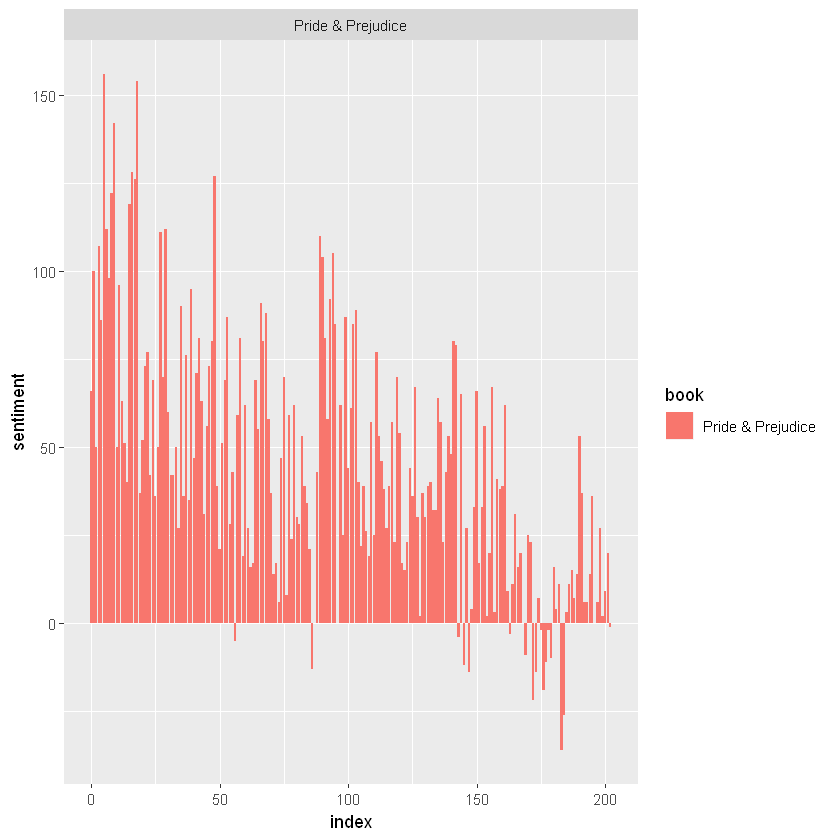

In [6]:
library(ggplot2)
ggplot(Pride_Predjudice_sentiment, aes(index, sentiment, fill = book)) +
 geom_bar(stat = "identity", show.legend = TRUE) +
 facet_wrap(~book, ncol = 2, scales = "free_x")

In [7]:
counting_words <- tidy_data %>%
 inner_join(bing) %>%
 count(word, sentiment, sort = TRUE)
head(counting_words)

Joining, by = "word"


word,sentiment,n
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


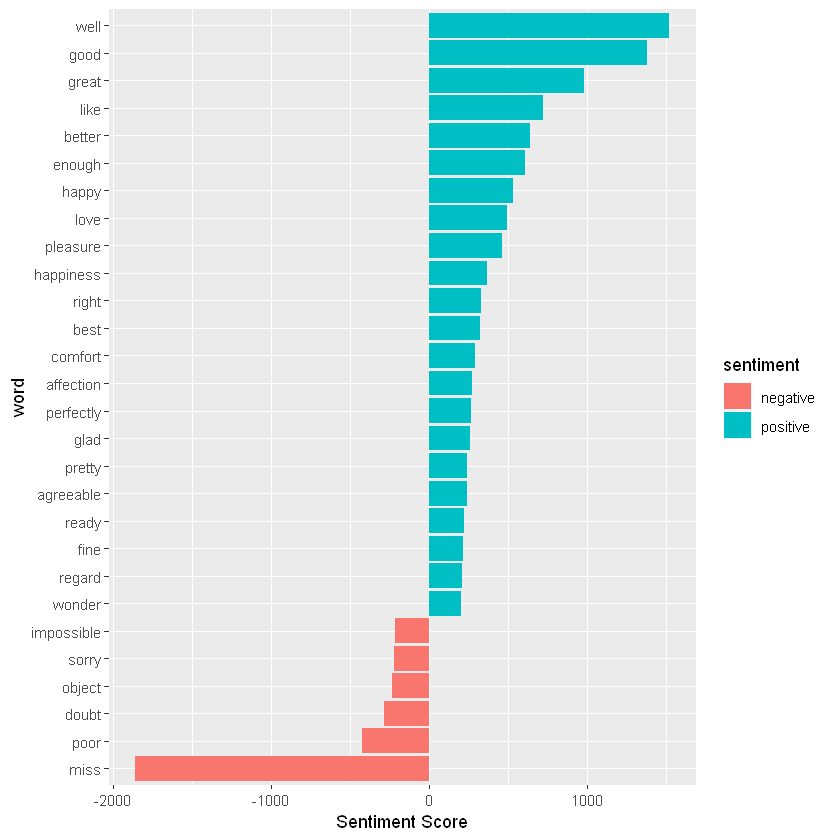

In [8]:
counting_words %>%
 filter(n > 200) %>%
 mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
 mutate(word = reorder(word, n)) %>%
 ggplot(aes(word, n, fill = sentiment))+
 geom_col() +
 coord_flip() +
 labs(y = "Sentiment Score")


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Joining, by = "word"


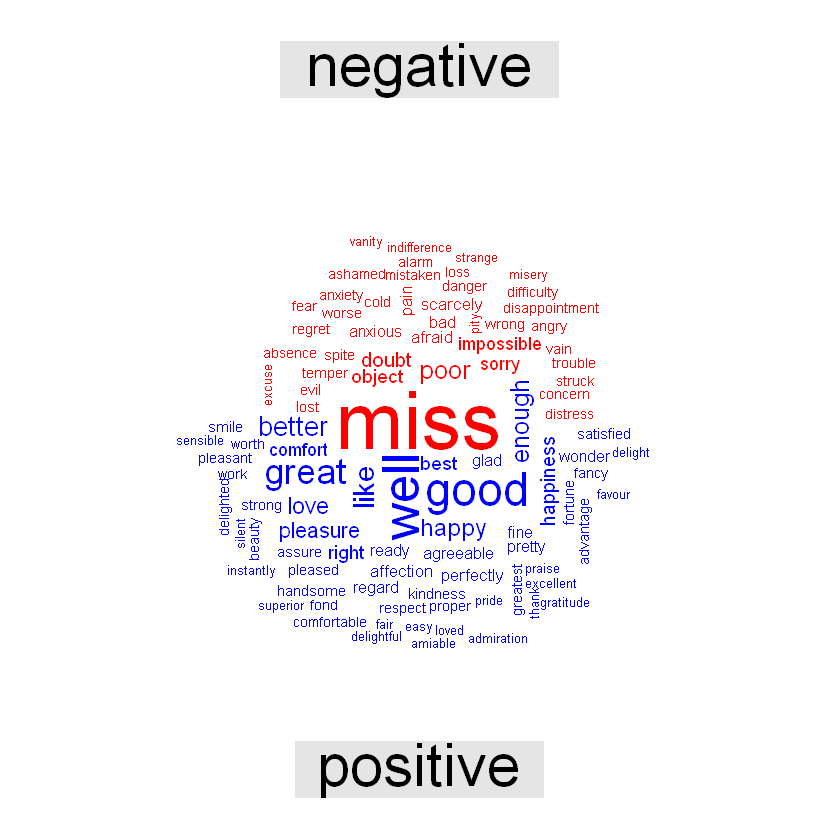

In [9]:
library(reshape2)
library(wordcloud)
tidy_data %>%
 inner_join(bing) %>%
 count(word, sentiment, sort = TRUE) %>%
 acast(word ~ sentiment, value.var = "n", fill = 0) %>%
 comparison.cloud(colors = c("red", "blue"),
          max.words = 100)